<a href="https://colab.research.google.com/github/abbyWoot/AML/blob/master/AML_Project2_JiahuiWu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project2-Q1
Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes then evaluates the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set: how does it compare to the previous classifier?

In [0]:
#Set Up
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Load data from Fashion dataset

In [0]:
from sklearn.datasets import fetch_openml 
#Was using fetch_mldata, and received an ImportError: cannot import name 'fetch_mldata' from 'sklearn.datasets
#Fmnist_data = fetch_mldata('Fashion-MNIST original') 
#Since the SKLEARN library was failing 
#using the tensflow to download the Fashion MNIST data
import tensorflow as tf
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()
print(f"Length of the X_train: {X_train.shape}, Length of y_train is: {y_train.shape}")
print(f"Length of the X_test:{X_test.shape}, Length of y_test is{y_test.shape}")

Length of the X_train: (60000, 28, 28), Length of y_train is: (60000,)
Length of the X_test:(10000, 28, 28), Length of y_test is(10000,)


In [0]:
#Convert the X_train and X_test data into 2d array:
nsamples, nx, ny = X_train.shape
d2_X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
d2_X_test = X_test.reshape((nsamples,nx*ny))

In [0]:
#Train the Random Forest Classifier and capture the time taken to train the model
#import library
from sklearn.ensemble import RandomForestClassifier
import time
#initial the model
rnd_clf = RandomForestClassifier()
start_time = time.time()
#Train the model
rnd_clf.fit(d2_X_train, y_train)
print("Time is taken by model:","— %s seconds —"% (time.time()-start_time))

Time is taken by model: — 103.9625358581543 seconds —


It took a long time by this model. And the accuracy is only 87%..... compare to normal MINST dataset


In [0]:
#Perfom the prediction on test data
y_predict = rf_clf.predict(d2_X_test)

#Measure the accurancy of the Classifier
from sklearn.metrics import accuracy_score
print(f"Accuracy is {accuracy_score(y_predict, y_test) * 100}%")

Accuracy is 87.77000000000001%


Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%

In [0]:
#Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%
from sklearn.decomposition import PCA
pca = PCA(n_components = .95) #This will insure that 95% variance is covered
X_train_reduced = pca.fit_transform(d2_X_train)

#Verify the redued shape before we start training new model
print(f"X_train shape is {d2_X_train.shape} and X_train_reduced shape is {X_train_reduced.shape}")

X_train shape is (60000, 784) and X_train_reduced shape is (60000, 187)


Train a new Random Forest classifier on the reduced dataset and see how long it takes

In [0]:
rf_clf2 = RandomForestClassifier(random_state = 42) 
start_time2 = time.time() 
rf_clf2.fit(X_train_reduced, y_train) #Train the model 
print("Time is taken by model:","— %s seconds —"% (time.time()-start_time2))

Time is taken by model: — 131.5805904865265 seconds —


Evaluate the classifier on the test set

In [0]:
X_test_reduced = pca.transform(d2_X_test) #Reduce the dimensionality first
y_predict2 = rf_clf2.predict(X_test_reduced) #Predic the values using Model
print(f"Accuracy is {accuracy_score(y_predict2, y_test)* 100} %") #Print the accuracy

Accuracy is 85.87 %


Answers to the Q1: The second run is much slower than the previous model. It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. PCA really did not help: it slowed down training and reduced performance.

Q2-Used t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

The FASION MNIST dataset was loaded above.

In [0]:
#Convert the X_train and X_test data into 2d array
nsamples, nx, ny = X_train.shape 
d2_X_train = X_train.reshape((nsamples,nx*ny)) 
nsamples, nx, ny = X_test.shape 
d2_X_test = X_test.reshape((nsamples,nx*ny))

#Dimensionality reduction on the full 60,000 images takes a very long time, so we are doing this on a random subset of 10,000 images:
import numpy as np 
np.random.seed(42) 
train_set = 10000 
idx = np.random.permutation(60000)[:train_set] 
X = d2_X_train[idx] 
y = y_train[idx]
print(f"Length of the X : {X.shape}, Length of y is : {y.shape}")

Length of the X : (10000, 784), Length of y is : (10000,)


Now we'll use t-SNE to reduce dimensionality down to 2D so we can plot the dataset. Current dimension is 784. 

In [0]:
from sklearn.manifold import TSNE 
tsne_red = TSNE(n_components=2, random_state=42) 
X_reduced = tsne_red.fit_transform(X)

Now we’ll use Matplotlib to plot a scatterplot, we’ll use different colors for different digits

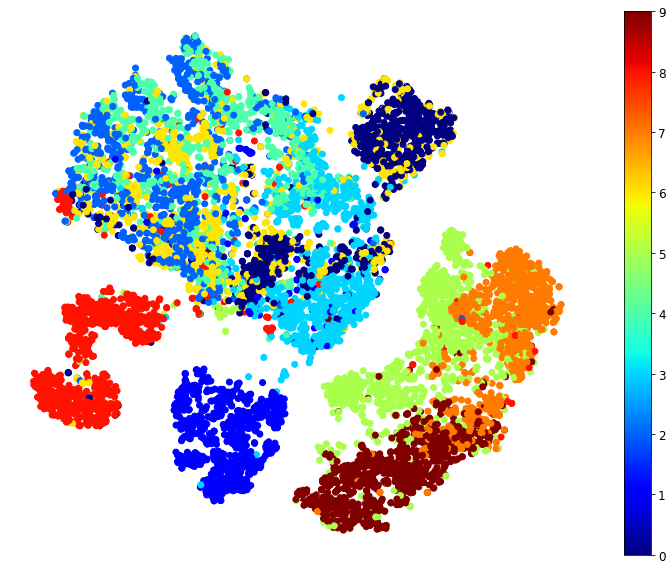

In [38]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet") 
plt.axis('off') 
plt.colorbar()
plt.show()

This plot tells us which numbers are easily distinguishable from the others (e.g., 0s, 6s, and most 8s are rather well separated clusters), and it also tells us which numbers are often hard to distinguish (e.g., 4s and 9s, 5s and 3s, and so on).

Let's focus on digits 3 and 5, which seem to overlap a lot.

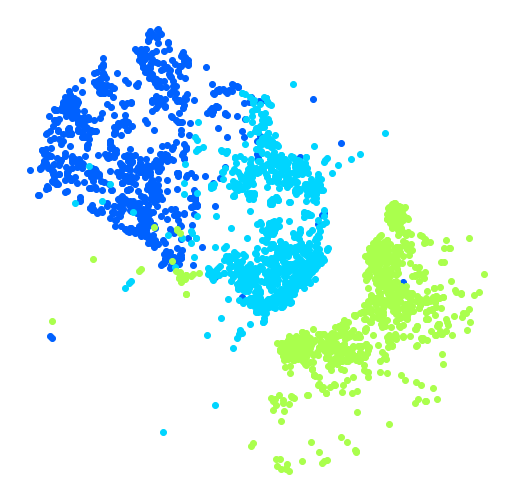

In [37]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Now we'll produce a nicer image by running t-SNE on these 3 digits:

In [0]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

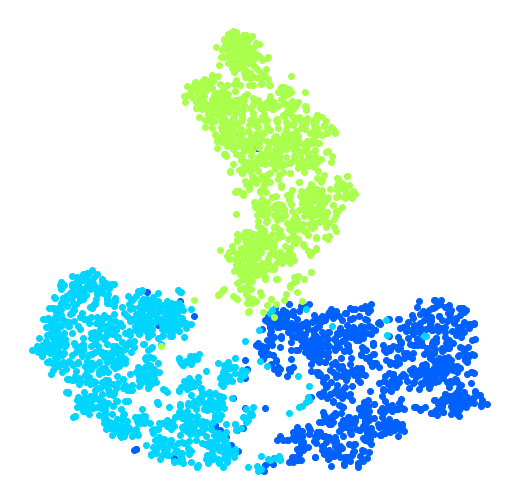

In [40]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Last, we'll use another dimensionality reduction algorithm PCA 
to compare the resulting visualizations.

In [42]:
from sklearn.pipeline import Pipeline
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

PCA+t-SNE took 102.1s.


NameError: ignored